### Sentiment Analysis on Customer Reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [4]:
df_reviews = pd.read_csv('review.csv')
df_reviews.head()

,Review,Title,Date
0,No doubt it has a great bass and to a great ex...,boAt Rockerz 255,2024-12-28
1,"This earphones are unreliable, i bought it be...",boAt Rockerz 255,2024-12-22
2,"i bought itfor 999,I purchased it second time,...",boAt Rockerz 255,2024-12-27
3,Its sound quality is adorable. overall it was ...,boAt Rockerz 255,2024-12-20
4,Its Awesome... Good sound quality & 8-9 hrs ba...,boAt Rockerz 255,2024-12-29


Product and Number of Reviews

In [5]:
df_reviews['Title'].value_counts()

Title
boAt Rockerz 255         20
Flybot Wave              20
Flybot Boom              20
PTron Intunes            20
Flybot Beat              20
Samsung EO-BG950CBEIN    20
Name: count, dtype: int64

In [6]:
from transformers import pipeline

c:\Users\ROHITH M\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the pre-trained huggingface sentiment analysis model

In [7]:
sentiment_analyzer = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Creating a function to get the sentiment of the reviews

In [9]:
def get_sentiment(text):
    try:
        result = sentiment_analyzer(text)
        print(f'Sentiment result for {text}: {result}')
        sentiment = result[0]['label']
        return sentiment
    except Exception as e:
        print(f'Error: {e}')
        return "NEUTRAL"

Preprocess the data by changing the date column to datetime

In [15]:
def preprocess_review_data(file_path):
    data = pd.read_csv(file_path)
    data["Date"] = pd.to_datetime(data["Date"])
    return data



Get sentiment for each review

In [16]:
def sentiment_to_score(sentiment):
    if sentiment == 'POSITIVE':
        return 1
    elif sentiment == 'NEGATIVE':
        return -1
    else:
        return 0

Aggregate sentiment scores for each title and date in the dataset 

In [17]:
def aggregate_sentiment(sentiment_df):
    sentiment_df["sentiment_score"] = sentiment_df["sentiment"].apply(sentiment_to_score)
    sentiment_agg = sentiment_df.groupby(["Date", "Title"])["sentiment_score"].mean().reset_index()
    return sentiment_agg


In [21]:
def main(file_path):
    # load and preprocess the review data
    review_data = preprocess_review_data(file_path)

    # perform sentiment analysis on the reviews
    review_data["sentiment"] = review_data["Review"].apply(get_sentiment)

    # Aggregate the sentiment scores by date and title
    sentiment_agg = aggregate_sentiment(review_data)
    
if __name__ == "__main__":
    file_path = "review.csv"
    main(file_path)

Sentiment result for No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.
: [{'label': 'NEGATIVE', 'score': 0.9970992803573608}]
Sentiment result for This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying​ this unreliable product.Thanks.
: [{'label': 'NEGATIVE', 'score': 0.9989176988601685}]
Sentiment result for i bought itfo

Plotted the sentiment scores 

In [22]:
file_path = "review.csv"
review_data = preprocess_review_data(file_path)
review_data["sentiment"] = review_data["Review"].apply(get_sentiment)

# Aggregate the sentiment scores by date and title
sentiment_agg = aggregate_sentiment(review_data)

# Plot sentiment trend for each unique title
unique_titles = sentiment_agg["Title"].unique()


Sentiment result for No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.
: [{'label': 'NEGATIVE', 'score': 0.9970992803573608}]
Sentiment result for This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying​ this unreliable product.Thanks.
: [{'label': 'NEGATIVE', 'score': 0.9989176988601685}]
Sentiment result for i bought itfo

In [23]:
sentiment_agg

,Date,Title,sentiment_score
0,2024-12-20,Flybot Beat,1.000000
1,2024-12-20,Flybot Boom,0.000000
2,2024-12-20,PTron Intunes,1.000000
3,2024-12-20,Samsung EO-BG950CBEIN,-1.000000
4,2024-12-20,boAt Rockerz 255,-1.000000
5,2024-12-21,Flybot Beat,1.000000
6,2024-12-21,Flybot Wave,-0.333333
7,2024-12-21,PTron Intunes,-0.250000
8,2024-12-21,Samsung EO-BG950CBEIN,1.000000
9,2024-12-21,boAt Rockerz 255,0.000000


Plot sentiment trend for each unique title

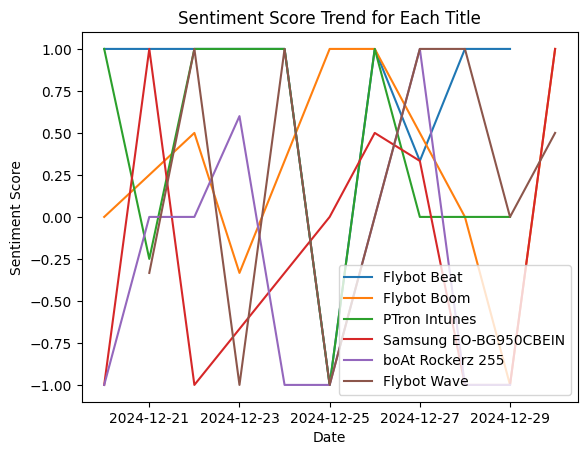

In [24]:
# Plot sentiment trend for each unique title

unique_titles = sentiment_agg["Title"].unique()

for title in unique_titles:
    title_data = sentiment_agg[sentiment_agg["Title"] == title]
    plt.plot(title_data["Date"], title_data["sentiment_score"], label=title)

plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Trend for Each Title")
plt.legend()
plt.show()



# Final Documentation of the Process

## 1. Load and Preprocess the Review Data
- Import necessary libraries.
- Preprocess the data, collecte Title, Date, and Review columns for 6 unique products, removing any missing values. 
- Load the review dataset into a DataFrame.

## 2. Perform Sentiment Analysis on the Reviews
- Use a sentiment analysis model ( Hugging Face Transformers) to analyze the sentiment of each review.
- Analyze the sentiment of each review and assign a sentiment score.
- Add a new column in the dataset to store the sentiment scores.

## 3. Aggregate the Sentiment Scores by Date and Title
- Group the dataset by unique titles and dates.
- Calculate aggregate metrics (e.g., average sentiment score) for each title by date.
- Create a new dataset for aggregated sentiment scores.

## 4. Plot Sentiment Trend for Each Unique Title
- Use a plotting library (Matplotlib) to visualize the sentiment trends.
- Generate a line plot for each title, showing sentiment scores over time.
- Customize the plot with labels, titles, and legends for better readability.
